In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import numpy as np
import networkx as nx
from collections import deque
from collections import defaultdict

In [2]:
def tetrahedron_volume(A, B, C, D):
    # Convert input lists to numpy arrays
    A = np.array(A)
    B = np.array(B)
    C = np.array(C)
    D = np.array(D)

    # Calculate the volume using the formula
    DA = D - A
    DB = D - B
    DC = D - C

    volume = np.abs(np.dot(DA, np.cross(DB, DC))) / 6.0  
    
    return volume

In [3]:
# def find_largest_volume(df, stress_threshold=50):
#     # Filter elements with stress above threshold
#     df_filtered = df[df['stress'] > stress_threshold]
    
#     # Create a dictionary to store neighbors for each node
#     neighbors = defaultdict(set)
#     elements = df_filtered['element'].values
#     nodes_cols = ['node 1', 'node 2', 'node 3', 'node 4']
#     nodes_values = df_filtered[nodes_cols].values.astype(int)

#     for i, nodes1 in enumerate(nodes_values):
#         for j, nodes2 in enumerate(nodes_values):
#             if i == j:
#                 continue
#             shared_nodes = set(nodes1).intersection(nodes2)
#             if len(shared_nodes) == 3:
#                 neighbors[elements[i]].add(elements[j])

#     visited = set()
#     largest_region = set()

#     for start_element in neighbors:
#         if start_element not in visited:
#             region = set()
#             stack = [start_element]

#             while stack:
#                 current_element = stack.pop()
#                 if current_element not in visited:
#                     visited.add(current_element)
#                     region.add(current_element)
#                     stack.extend(neighbors[current_element] - visited)

#             if len(region) > len(largest_region):
#                 largest_region = region
                
#     region_volume = df[df['element'].isin(largest_region)]['volume'].sum()

#     return largest_region, region_volume

def find_largest_volume(df, stress_threshold=50):
    # Filter elements with stress above threshold
    df_filtered = df[df['stress'] > stress_threshold]
    
    # Create a dictionary to store neighbors for each node
    neighbors = defaultdict(set)
    elements = df_filtered['element'].values
    nodes_cols = ['node 1', 'node 2', 'node 3', 'node 4']
    nodes_values = df_filtered[nodes_cols].values.astype(int)

    for i, nodes1 in enumerate(nodes_values):
        for j, nodes2 in enumerate(nodes_values):
            if i == j:
                continue
            shared_nodes = set(nodes1).intersection(nodes2)
            if len(shared_nodes) == 3:
                neighbors[elements[i]].add(elements[j])

    visited = set()
    largest_region = set()
    largest_volume = 0

    for start_element in neighbors:
        if start_element not in visited:
            region = set()
            stack = [start_element]

            while stack:
                current_element = stack.pop()
                if current_element not in visited:
                    visited.add(current_element)
                    region.add(current_element)
                    stack.extend(neighbors[current_element] - visited)

            volume = df_filtered[df_filtered['element'].isin(region)]['volume'].sum()
            if volume > largest_volume: 
                largest_volume = volume
                largest_region = region
            # if len(region) > len(largest_region):
            #     largest_region = region
                
    region_volume = df[df['element'].isin(largest_region)]['volume'].sum()

    return largest_region, region_volume

In [4]:
def find_maxStress(df, stressGuess = 200, goalVolume = 100):
    step = 0.01
    volumes = []
    regions = []
    stresses = [stressGuess]
    volumes.append(find_largest_volume(df, stress_threshold = stressGuess)[1])
    regions.append(len(find_largest_volume(df, stress_threshold = stressGuess)[0]))
    while volumes[-1] < goalVolume:
        stresses.append(stresses[-1] - step)
        if stresses[-1] == 0:
            volumes.append(1000)
            break
        volumes.append(find_largest_volume(df, stress_threshold = stresses[-1])[1])
        regions.append(len(find_largest_volume(df, stress_threshold = stresses[-1])[0]))
        # print(f"for stress of {stresses[-1]}, maximum volume is {volumes[-1]} with region of {regions[-1]} elements")
    # print(f"stress is between {stresses[-1]} and {stresses[-2]}, because volumes are between {volumes[-1]} and {volumes[-2]}")

    # step = 0.001
    # volumes = [volumes[-2]]
    # stresses = [stresses[-2]]
    # volumes.append(find_largest_volume(df, stress_threshold = stressGuess)[1])
    # while volumes[-1] < goalVolume:
    #     stresses.append(stresses[-1] - step)
    #     if stresses[-1] == 0:
    #         volumes.append(1000)
    #         break
    #     volumes.append(find_largest_volume(df, stress_threshold = stresses[-1])[1])
    #     regions.append(len(find_largest_volume(df, stress_threshold = stresses[-1])[0]))
        # print(f"for stress of {stresses[-1]}, maximum volume is {volumes[-1]} with region of {regions[-1]} elements")
    # print(f"stress is between {stresses[-1]} and {stresses[-2]}, because volumes are between {volumes[-1]} and {volumes[-2]}")

    # step = 0.0001
    # volumes = [volumes[-2]]
    # stresses = [stresses[-2]]
    # volumes.append(find_largest_volume(df, stress_threshold = stressGuess)[1])
    # while volumes[-1] < goalVolume:
    #     stresses.append(stresses[-1] - step)
    #     if stresses[-1] == 0:
    #         volumes.append(1000)
    #         break
    #     volumes.append(find_largest_volume(df, stress_threshold = stresses[-1])[1])
    #     regions.append(len(find_largest_volume(df, stress_threshold = stresses[-1])[0]))
    #     # print(f"for stress of {stresses[-1]}, maximum volume is {volumes[-1]} with region of {regions[-1]} elements")
    # print(f"stress is between {stresses[-1]} and {stresses[-2]}, because volumes are between {volumes[-1]} and {volumes[-2]}")

    index, volume = min(enumerate(volumes[-2:]), key=lambda x: abs(x[1] - goalVolume))
    volume = volumes[-2:][index]
    stress = stresses[-2:][index]
    return stress, volume

<h3>Step 1: setup the model dataframe</h3>

In [5]:
modelDirectory = "C:/Users/jake/OneDrive/Documents/Jake/Academia/Graduate School/Research/Osseointegration/Methodv12/AMCOI25/FEA/"
parentDirectory = "C:/Users/jake/OneDrive/Documents/Jake/Academia/Graduate School/Research/Osseointegration/Methodv12/AMCOI25/FEA/results/stresses/"
regions = ['SHELL', 'SHAFT', 'IMPLANT', 'TROCHANTERIC', 'FEMORAL_HEAD', 'SUBTROCHANTERIC', 'FEMORAL_NECK']
# regions = ['SHAFT', 'IMPLANT', 'TROCHANTERIC', 'FEMORAL_HEAD', 'SUBTROCHANTERIC', 'FEMORAL_NECK']
regions = ['DIAPHYSIS', 'METAPHYSIS', 'EPIPHYSIS', 'IMPLANT', 'IMPLANT_SCREWS', 'INTERFACE']
models = ['OI01_femur', 'OI02_femur', 'OI05_femur', 'OI10_femur', 'OI14_femur', 'OI16_femur', 'OI17_femur', 'OI19_femur', 'OI21_femur',
          'OI07_tibia', 'OI26_tibia', 'OI32_tibia', 'OI37_tibia', 'OI46_tibia', 'OI51_tibia', 'OI54_tibia', 'OI57_tibia']
names = ['AMCOI01', 'AMCOI02', 'AMCOI05', 'AMCOI10', 'AMCOI14', 'AMCOI16', 'AMCOI17', 'AMCOI19', 'AMCOI21',
          'AMCOI07_LTTA', 'AMCOI26_RTTA', 'AMCOI32_LTTA', 'AMCOI37_LTTA', 'AMCOI46_LTTA', 'AMCOI51_RTTA', 'AMCOI54_RTTA', 'AMCOI57_RTTA']
intervals = [87, 74, 79, 100, 85, 89, 76, 78, 74,
             59, 74, 74, 70, 84, 81, 76, 78]

In [6]:
for i in range(9, len(models)):
    model = models[i]
    name = names[i]
    modelDirectory = f"C:/Users/jake/OneDrive/Documents/Jake/Academia/Graduate School/Research/Osseointegration/Methodv15/{name}/FEA/step 3/"
    groupsDirectory = f"C:/Users/jake/OneDrive/Documents/Jake/Academia/Graduate School/Research/Osseointegration/Methodv15/{name}/FEA/step 4/"
    saveDirectory = f"C:/Users/jake/OneDrive/Documents/Jake/Academia/Graduate School/Research/Osseointegration/Methodv15/{name}/FEA/step 4/"
    stressesDirectory = f"C:/Users/jake/OneDrive/Documents/Jake/Academia/Graduate School/Research/Osseointegration/Methodv15/{name}/FEA/step 4/results/"
    stressesStore = []
    modelFile = modelDirectory + model + '.inp'
    nodeCoordinates = []
    elementNodes = []
    neighbors = []

    with open(modelFile) as mf:
        for line in mf:
            try: 
                row = [float(x.strip()) for x in line.split(',')]
                if len(row) == 4:
                    nodeCoordinates.append(row)
                elif len(row) == 5:
                    elementNodes.append(row)
            except:
                pass

    df = pd.DataFrame(elementNodes, columns = ['element', 'node 1', 'node 2', 'node 3', 'node 4'])
    df['element'] = df['element'].astype(int)
    df['node 1'] = df['node 1'].astype(int)
    df['node 2'] = df['node 2'].astype(int)
    df['node 3'] = df['node 3'].astype(int)
    df['node 4'] = df['node 4'].astype(int)
    df.set_index('element', inplace = True)
    df = df.sort_values(by = 'element')
    print(f"TF element dataframe made")

    nodes = pd.DataFrame(nodeCoordinates, columns = ['node', 'x', 'y', 'z'])
    nodes['node'] = nodes['node'].astype(int)
    nodes.set_index('node', inplace = True)

    volumes = []
    for index, row in df.iterrows():
        A = nodes.loc[row['node 1']]
        B = nodes.loc[row['node 2']]
        C = nodes.loc[row['node 3']]
        D = nodes.loc[row['node 4']]
        volumes.append([index, tetrahedron_volume(A, B, C, D)])

    vols = pd.DataFrame(volumes, columns = ['element', 'volume'])
    vols['element'] = vols['element'].astype(int)
    vols.set_index('element', inplace = True)

    df = pd.merge(df, vols, on = 'element')
    print(f"TF element volumes added to dataframe")

    labels = groupsDirectory + 'groups.txt'
    labels = pd.read_csv(labels, names = ['region', 'set', 'element'], skiprows = 1)
    labels.drop(columns = ['set'], inplace = True)
    labels.set_index('element', inplace = True)
    df = pd.merge(df, labels, on = 'element')
    print(f"TF element labels added to dataframe")

    for j in range(intervals[i]+1):
        stresses = []
        results = stressesDirectory + 'stress_' + str(j) + '.rpt'
        with open(results) as mf:
            for line in mf:
                try: 
                    row = [float(value) for value in line.split()]
                    if len(row) == 2:
                        stresses.append(row)
                except:
                    pass
        stresses = pd.DataFrame(stresses, columns = ['element', 'stress'])
        stresses['element'] = stresses['element'].astype(int)
        stresses = stresses.sort_values(by= 'stress', ascending=False)
        stresses = stresses.drop_duplicates(subset='element')
        dfi = pd.merge(df, stresses, on = 'element')
        # print(f"TF_{i} element stresses added to dataframe")

        store = []
        for region in regions:
            tempDF = dfi[dfi['region'] == region][['element', 'node 1', 'node 2', 'node 3', 'node 4', 'volume', f'stress']]
            tempDF.rename(columns = {f'stress': 'stress'}, inplace = True)
            stress, volume = find_maxStress(tempDF, goalVolume = 60)
            store.append(stress)
            print(f"TF_{j} {region} done, stress calculated: {stress}, volume size: {volume}")
        stressesStore.append(store)
    stressesStore = pd.DataFrame(stressesStore, columns = regions)
    stressesStore.to_excel(saveDirectory + "results.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jake/OneDrive/Documents/Jake/Academia/Graduate School/Research/Osseointegration/Methodv15/AMCOI07_LTTA/FEA/step 3/OI07_tibia.inp'

In [ ]:
stressesStoreNP = np.array(stressesStore)

In [ ]:
np.shape(stressesStore)

(89, 1)

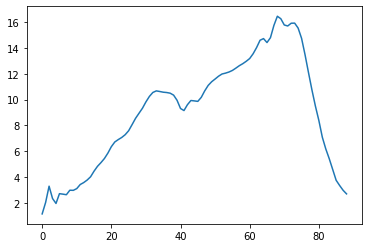

In [ ]:
plt.plot(stressesStoreNP[:,0])

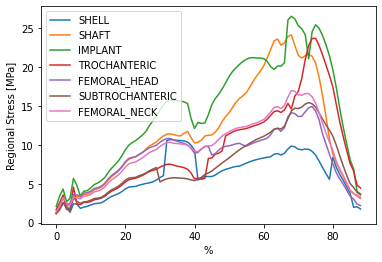

In [ ]:
# regions = ['SHELL', 'SHAFT', 'IMPLANT', 'TROCHANTERIC', 'FEMORAL_HEAD', 'SUBTROCHANTERIC', 'FEMORAL_NECK']


plt.plot(stressesStoreNP[:,0], label = regions[0])
plt.plot(stressesStoreNP[:,1], label = regions[1])
plt.plot(stressesStoreNP[:,2], label = regions[2])
plt.plot(stressesStoreNP[:,3], label = regions[3])
plt.plot(stressesStoreNP[:,4], label = regions[4])
plt.plot(stressesStoreNP[:,5], label = regions[5])
plt.plot(stressesStoreNP[:,6], label = regions[6])
plt.ylabel('Regional Stress [MPa]')
plt.xlabel('%')
plt.legend()